In [10]:
def rid_sol(protein_mol2_file_path):
    """
    Given a path to a `protein.mol2` file, removes the `HOH` and `GTP` lines and returns the modified contents as a string.

    Parameters:
    -----------
    protein_mol2_file_path : str
        The path to the `protein.mol2` file.

    Returns:
    --------
    str
        The modified contents of the `protein.mol2` file as a string.
    """
    with open(protein_mol2_file_path, 'r') as f:
        lines = f.readlines()

    new_lines = []
    for line in lines:
        if line.startswith('HETATM') and 'HOH' not in line and 'GTP' not in line:
            new_lines.append(line)

    return ''.join(new_lines)


In [11]:
import openbabel

def convert_pdb_to_mol2(pdb_file_path: str, mol2_file_path: str):
    """
    Convert a PDB file to a MOL2 file using Open Babel.

    Parameters:
    -----------
    pdb_file_path : str
        The path to the input PDB file.
    mol2_file_path : str
        The path to the output MOL2 file.
    """
    # Create Open Babel objects
    ob_conversion = openbabel.OBConversion()
    ob_mol = openbabel.OBMol()

    # Set input and output formats
    ob_conversion.SetInAndOutFormats("pdb", "mol2")

    # Read the PDB file
    ob_conversion.ReadFile(ob_mol, pdb_file_path)

    # Write the MOL2 file
    ob_conversion.WriteFile(ob_mol, mol2_file_path)



In [12]:
import os
import pandas as pd

input_path = './data'

pdb_ids = [name for name in os.listdir(input_path) if os.path.isdir(os.path.join(input_path, name))]

df = pd.DataFrame({'pdb': pdb_ids})
df.to_csv('data.tsv', index=False, sep='\t')


In [13]:
import os
import pandas as pd

input_path = './bench2'
df = pd.read_csv('bench2.tsv', sep='\t')

pdb_ids = df['pdb']
pdb_ids_list = list(pdb_ids)

for pdb_id in pdb_ids:
    pdb_file_path = os.path.join(input_path, pdb_id, f'protein.pdb')
    mol2_file_path = os.path.join(input_path, pdb_id, f'protein.mol2')
    
    ligand_pdb_file_path = os.path.join(input_path, pdb_id, f'ligand.pdb')
    ligand_mol_file_path = os.path.join(input_path, pdb_id, f'ligand.mol2')
    
    convert_pdb_to_mol2(pdb_file_path, mol2_file_path)
    convert_pdb_to_mol2(ligand_pdb_file_path, ligand_mol_file_path)
    
    rid_sol(mol2_file_path)

*** Open Babel Error  in ReadFile
  Cannot read from ./bench2/2sim/ligand.pdb
*** Open Babel Error  in ReadFile
  Cannot read from ./bench2/1nna/ligand.pdb
*** Open Babel Error  in ReadFile
  Cannot read from ./bench2/2sil/ligand.pdb
*** Open Babel Error  in ReadFile
  Cannot read from ./bench2/1ivd/ligand.pdb
*** Open Babel Error  in ReadFile
  Cannot read from ./bench2/1byb/ligand.pdb
*** Open Babel Error  in ReadFile
  Cannot read from ./bench2/1hyt/ligand.pdb
*** Open Babel Error  in ReadFile
  Cannot read from ./bench2/3ptb/ligand.pdb
*** Open Babel Error  in ReadFile
  Cannot read from ./bench2/1mtw/ligand.pdb
*** Open Babel Error  in ReadFile
  Cannot read from ./bench2/1snc/ligand.pdb
*** Open Babel Error  in ReadFile
  Cannot read from ./bench2/1hew/ligand.pdb
*** Open Babel Error  in ReadFile
  Cannot read from ./bench2/3phv/ligand.pdb
*** Open Babel Error  in ReadFile
  Cannot read from ./bench2/1bya/ligand.pdb
*** Open Babel Error  in ReadFile
  Cannot read from ./bench2/1h

KeyboardInterrupt: 

In [14]:
import openbabel
import os
from concurrent.futures import ThreadPoolExecutor

def convert_mol2_to_pdb(mol2_file_path: str, pdb_file_path: str):
    """
    Convert a MOL2 file to a PDB file using Open Babel.

    Parameters:
    -----------
    mol2_file_path : str
        The path to the input MOL2 file.
    pdb_file_path : str
        The path to the output PDB file.
    """
    # Create Open Babel objects
    ob_conversion = openbabel.OBConversion()
    ob_mol = openbabel.OBMol()

    # Set input and output formats
    ob_conversion.SetInAndOutFormats("mol2", "pdb")

    # Read the MOL2 file
    ob_conversion.ReadFile(ob_mol, mol2_file_path)

    # Write the PDB file
    ob_conversion.WriteFile(ob_mol, pdb_file_path)


def convert_mol2_to_pdb_wrapper(pdb_id, input_path, output_path):
    mol2_file_path = os.path.join(input_path, pdb_id, 'protein.mol2')
    pdb_file_path = os.path.join(output_path, pdb_id, 'protein.pdb')
    convert_mol2_to_pdb(mol2_file_path, pdb_file_path)

# Example usage
input_path = './bench2'
output_path = './bench2'

if not os.path.exists(output_path):
    os.makedirs(output_path)

pdb_ids = [name for name in os.listdir(input_path) if os.path.isdir(os.path.join(input_path, name))]

print(pdb_ids)

# Set the number of threads to the number of available CPU cores
num_threads = os.cpu_count()

with ThreadPoolExecutor(max_workers=num_threads) as executor:
    executor.map(convert_mol2_to_pdb_wrapper, pdb_ids, [input_path] * len(pdb_ids), [output_path] * len(pdb_ids))


['2sim', '1nna', '2sil', '1ivd', '1byb', '1hyt', '3ptb', '1mtw', '1snc', '1hew', '3phv', '1bya', '1hfc', '1pso', '8rat', '1rob', '6ins', '1gca', '2ctc', '1cge', '2ifb', '1krn', '1pdz', '1ifb', '1imb', '1ahc', '1esa', '2ctv', '3gch', '1mrg', '1apu', '6rsa', '1rbp', '4phv', '1psn', '8adh', '5cna', '1hxf', '1dwd', '1npc', '1chg', '1a6u', '1a6w', '2ypi', '3ptn', '7cpa', '7rat', '1ime', '1djb', '1blh', '1gcg', '1brq', '3app', '1pdy', '2pk4', '2tga', '1hel', '1inc', '2ctb', '1stn', '1ypi', '3mth']


*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is ./bench2/2sim/protein.pdb)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is ./bench2/2sil/protein.pdb)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is ./bench2/1byb/protein.pdb)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is ./bench2/1hyt/protein.pdb)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is ./bench2/3ptb/protein.pdb)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is ./bench2/1mtw/protein.pdb)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is ./bench2/1snc/protein.pdb)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is ./bench2/1he

In [3]:
# import os
# import shutil

# source_dir = './final_data/'
# target_files = ['protein.mol2', 'ligand.mol2']
# dst_dir = './data'

# for root, dirs, files in os.walk(source_dir):
#     for file in files:
#         if file in target_files:
#             src_path = os.path.join(root, file)
#             dst_path = os.path.join(dst_dir, os.path.basename(root), file)
#             os.makedirs(os.path.dirname(dst_path), exist_ok=True)
#             shutil.copy(src_path, dst_path)

# import os

# dir_path = './data'

# dirs = [d for d in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, d))]

# for d in dirs:
#     new_name = d[:4]
#     os.rename(os.path.join(dir_path, d), os.path.join(dir_path, new_name))

In [15]:
import os
import pandas as pd


def calculate_ligand_center(mol2_file_path):
    """
    Given a path to a `ligand.mol2` file, calculates and returns the center coordinates of the ligand.

    Parameters:
    -----------
    mol2_file_path : str
        The path to the `ligand.mol2` file.

    Returns:
    --------
    tuple of floats
        The x, y, and z coordinates of the center of the ligand.
    """
    with open(mol2_file_path, 'r') as f:
        lines = f.readlines()

    lines = [line.split() for line in lines]

    x_sum, y_sum, z_sum, n_atoms = 0, 0, 0, 0

    for line in lines:
        if len(line) == 9:
            x, y, z, *_ = line[2:5]
            x_sum += float(x)
            y_sum += float(y)
            z_sum += float(z)
            n_atoms += 1

    center_x, center_y, center_z = x_sum/n_atoms, y_sum/n_atoms, z_sum/n_atoms
    return center_x, center_y, center_z


In [16]:
import os
import pandas as pd
import numpy as np
from typing import Tuple, List

non_standard_to_standard = {
    '2AS':'ASP', '3AH':'HIS', '5HP':'GLU', 'ACL':'ARG', 'AGM':'ARG', 'AIB':'ALA', 'ALM':'ALA', 'ALO':'THR', 'ALY':'LYS', 'ARM':'ARG',
    'ASA':'ASP', 'ASB':'ASP', 'ASK':'ASP', 'ASL':'ASP', 'ASQ':'ASP', 'ASX':'ASP', 'AYA':'ALA', 'BCS':'CYS', 'BHD':'ASP', 'BMT':'THR', 'BNN':'ALA', # Added ASX => ASP
    'BUC':'CYS', 'BUG':'LEU', 'C5C':'CYS', 'C6C':'CYS', 'CAS':'CYS', 'CCS':'CYS', 'CEA':'CYS', 'CGU':'GLU', 'CHG':'ALA', 'CLE':'LEU', 'CME':'CYS',
    'CSD':'ALA', 'CSO':'CYS', 'CSP':'CYS', 'CSS':'CYS', 'CSW':'CYS', 'CSX':'CYS', 'CXM':'MET', 'CY1':'CYS', 'CY3':'CYS', 'CYG':'CYS',
    'CYM':'CYS', 'CYQ':'CYS', 'DAH':'PHE', 'DAL':'ALA', 'DAR':'ARG', 'DAS':'ASP', 'DCY':'CYS', 'DGL':'GLU', 'DGN':'GLN', 'DHA':'ALA',
    'DHI':'HIS', 'DIL':'ILE', 'DIV':'VAL', 'DLE':'LEU', 'DLY':'LYS', 'DNP':'ALA', 'DPN':'PHE', 'DPR':'PRO', 'DSN':'SER', 'DSP':'ASP',
    'DTH':'THR', 'DTR':'TRP', 'DTY':'TYR', 'DVA':'VAL', 'EFC':'CYS', 'FLA':'ALA', 'FME':'MET', 'GGL':'GLU', 'GL3':'GLY', 'GLZ':'GLY',
    'GMA':'GLU', 'GSC':'GLY', 'HAC':'ALA', 'HAR':'ARG', 'HIC':'HIS', 'HIP':'HIS', 'HMR':'ARG', 'HPQ':'PHE', 'HTR':'TRP', 'HYP':'PRO',
    'IAS':'ASP', 'IIL':'ILE', 'IYR':'TYR', 'KCX':'LYS', 'LLP':'LYS', 'LLY':'LYS', 'LTR':'TRP', 'LYM':'LYS', 'LYZ':'LYS', 'MAA':'ALA', 'MEN':'ASN',
    'MHS':'HIS', 'MIS':'SER', 'MLE':'LEU', 'MPQ':'GLY', 'MSA':'GLY', 'MSE':'MET', 'MVA':'VAL', 'NEM':'HIS', 'NEP':'HIS', 'NLE':'LEU',
    'NLN':'LEU', 'NLP':'LEU', 'NMC':'GLY', 'OAS':'SER', 'OCS':'CYS', 'OMT':'MET', 'PAQ':'TYR', 'PCA':'GLU', 'PEC':'CYS', 'PHI':'PHE',
    'PHL':'PHE', 'PR3':'CYS', 'PRR':'ALA', 'PTR':'TYR', 'PYL':'LYS', 'PYX':'CYS', 'SAC':'SER', 'SAR':'GLY', 'SCH':'CYS', 'SCS':'CYS', 'SCY':'CYS', 'SEC':'CYS', # Added pyrrolysine and selenocysteine
    'SEL':'SER', 'SEP':'SER', 'SET':'SER', 'SHC':'CYS', 'SHR':'LYS', 'SMC':'CYS', 'SOC':'CYS', 'STY':'TYR', 'SVA':'SER', 'TIH':'ALA',
    'TPL':'TRP', 'TPO':'THR', 'TPQ':'ALA', 'TRG':'LYS', 'TRO':'TRP', 'TYB':'TYR', 'TYI':'TYR', 'TYQ':'TYR', 'TYS':'TYR', 'TYY':'TYR'
}

fa_letter = {
    'ALA': 'A', 'ARG': 'R', 'ASN': 'N', 'ASP': 'D', 'CYS': 'C',
    'GLN': 'Q', 'GLU': 'E', 'GLY': 'G', 'HIS': 'H', 'ILE': 'I',
    'LEU': 'L', 'LYS': 'K', 'MET': 'M', 'PHE': 'F', 'PRO': 'P',
    'SER': 'S', 'THR': 'T', 'TRP': 'W', 'TYR': 'Y', 'VAL': 'V',
    'UNK': 'X'}

def extract_AA(file_path: str) -> str:
    amino_acids = []
    residue_numbers = set()
    residue_last_CA = {}

    with open(file_path, 'r') as mol2_file:
        lines = mol2_file.readlines()
            
        for line in lines:
            if line.startswith('@<TRIPOS>BOND'):
                break

                
            split_line = line.split()
            if len(split_line) >= 7:  # Check if the line has enough items
                residue_number = int(split_line[6])
                if residue_number not in residue_numbers:
                    residue_numbers.add(residue_number)
                    residue_last_CA[residue_number] = ''
                    three_letter_code = split_line[7][:3]
                    one_letter_code = fa_letter.get(three_letter_code, 'X')
                    amino_acids.append(one_letter_code)
                atom_name = split_line[1]
                if atom_name == 'CA':
                    residue_last_CA[residue_number] = one_letter_code

        # Get the last CA atom for each residue
        for residue_number, aa in residue_last_CA.items():
            if aa:
                amino_acids.append(aa)

    return ''.join(amino_acids)



def labeling(file_path: str, center_coordinates: List[float], threshold: float = 10.0) -> Tuple[str, str]:
    labels = []
    coords = []
    center_coordinates_array = np.array(center_coordinates)

    with open(file_path, 'r') as mol2_file:
        lines = mol2_file.readlines()

        for line in lines:
            if line.startswith('@<TRIPOS>BOND'):
                break

            split_line = line.split()
            if len(split_line) >= 7:
                atom_name = split_line[1]

                if atom_name == 'CA':
                    coord = np.array([float(split_line[2]), float(split_line[3]), float(split_line[4])])
                    distance = np.linalg.norm(coord - center_coordinates_array)

                    if distance <= threshold:
                        labels.append('1')
                        coords.append(coord)
                    else:
                        labels.append('0')
    if len(coord) == 0:
        print(f"Warning: No coordinates found for CA atoms in {file_path}")
        return '', ''
    
    label_coord = np.mean(coords, axis=0)
    #print(label_coord)
    label_coord = f"{label_coord[0]}, {label_coord[1]}, {label_coord[2]}"

    return ''.join(labels), label_coord


# Read data.tsv and extract pdb_ids
df = pd.read_csv('data.tsv', sep='\t')
pdb_ids = df['pdb']
pdb_ids_list = list(pdb_ids)

df['AA'] = ''
df['labels'] = ''
df['CCA'] = ''

input_path = "./data"

for pdb_id in pdb_ids:
    pdb_file_path = os.path.join(input_path, pdb_id, f'protein.mol2')
    mol2_file_path = os.path.join(input_path, pdb_id, f'ligand.mol2')

    if not os.path.exists(pdb_file_path):
        print(f"Bad input for {pdb_id}: protein.mol2 file not found.")
    elif not os.path.exists(mol2_file_path):
        print(f"Bad input for {pdb_id}: ligand.mol2 file not found.")
    else:
        amino_acids = extract_AA(pdb_file_path)
        df.loc[df['pdb'] == pdb_id, 'AA'] = ''.join(amino_acids)

        center = calculate_ligand_center(mol2_file_path)

        labels, label_coord = labeling(pdb_file_path, center, threshold=10.0)
        df.loc[df['pdb'] == pdb_id, 'labels'] = ''.join(str(label) for label in labels)
        
        df.loc[df['pdb'] == pdb_id, 'CCA'] = str(label_coord)


df.to_csv('data.tsv', index=False, sep='\t')

In [17]:
if __name__ == '__main__':
    input_path = './data'

    # Read data.tsv and extract pdb_ids
    df = pd.read_csv('data.tsv', sep='\t')
    pdb_ids = df['pdb']
    pdb_ids_list = list(pdb_ids)
    #print(pdb_ids_list)

    # Add CCL column to data.tsv and calculate center coordinates for each pdb_id
    df['CCL'] = ''
    for pdb_id in pdb_ids:
        mol2_file_path = os.path.join(input_path, pdb_id, 'ligand.mol2')

        if not os.path.exists(mol2_file_path):
            print(f"Bad input for {pdb_id}: ligand.mol2 file not found.")
        else:
            center = calculate_ligand_center(mol2_file_path)
            df.loc[df['pdb'] == pdb_id, 'CCL'] = '{:.4f}, {:.4f}, {:.4f}'.format(center[0], center[1], center[2])

    # Write the updated data.tsv file
    df.to_csv('data.tsv', index=False, sep='\t')


In [18]:
def extract_CA(file_path: str) -> List[str]:
    ca_amino_acids = []

    with open(file_path, 'r') as mol2_file:
        lines = mol2_file.readlines()

        for line in lines:
            if line.startswith('@<TRIPOS>BOND'):
                break
            split_line = line.split()
                
            if len(split_line) >= 7:  # Check if the line has enough items
                atom_name = split_line[1]
                if atom_name == 'CA':
                    three_letter_code = split_line[7][:3]

                    one_letter_code = fa_letter.get(three_letter_code, 'X')
                    ca_amino_acids.append(one_letter_code)

    return ca_amino_acids


from typing import Tuple, List
import numpy as np

def labeling(file_path: str, center_coordinates: List[float], threshold: float = 10.0) -> Tuple[str, str, List[np.ndarray]]:
    labels = []
    coords = []
    all_coords = []
    center_coordinates_array = np.array(center_coordinates)

    with open(file_path, 'r') as mol2_file:
        lines = mol2_file.readlines()

        for line in lines:
            if line.startswith('@<TRIPOS>BOND'):
                break

            split_line = line.split()
            if len(split_line) >= 7:
                atom_name = split_line[1]

                if atom_name == 'CA':
                    coord = np.array([float(split_line[2]), float(split_line[3]), float(split_line[4])])
                    all_coords.append(coord)
                    distance = np.linalg.norm(coord - center_coordinates_array)

                    if distance <= threshold:
                        labels.append('1')
                        coords.append(coord)
                    else:
                        labels.append('0')

    label_coord = np.mean(coords, axis=0)
    #print(label_coord)
    label_coord = f"{label_coord[0]:.4f}, {label_coord[1]:.4f}, {label_coord[2]:.4f}"

    return ''.join(labels), label_coord, all_coords


# Read data.tsv and extract pdb_ids
df = pd.read_csv('data.tsv', sep='\t')
pdb_ids = df['pdb']
pdb_ids_list = list(pdb_ids)

df['AA'] = ''
df['labels'] = ''

input_path = "./data"

for pdb_id in pdb_ids:
    pdb_file_path = os.path.join(input_path, pdb_id, f'protein.mol2')
    mol2_file_path = os.path.join(input_path, pdb_id, f'ligand.mol2')

    if not os.path.exists(pdb_file_path):
        print(f"Bad input for {pdb_id}: protein.mol2 file not found.")
    elif not os.path.exists(mol2_file_path):
        print(f"Bad input for {pdb_id}: ligand.mol2 file not found.")
    else:
        amino_acids = extract_CA(pdb_file_path)
        
        #print(amino_acids)
        df.loc[df['pdb'] == pdb_id, 'AA'] = ''.join(amino_acids)

        center = calculate_ligand_center(mol2_file_path)

        labels, label_coord, all_coords = labeling(pdb_file_path, center, threshold=10.0)
        df.loc[df['pdb'] == pdb_id, 'labels'] = ''.join(str(label) for label in labels)
        
        df.loc[df['pdb'] == pdb_id, 'CCA'] = str(label_coord)


        #print(f"Number of all_coords: {len(all_coords)}, Number of ca_amino_acids: {len(amino_acids)} for {pdb_id}")

        #assert len(all_coords) == len(amino_acids), f"Number of coordinates and amino acids do not match for {pdb_id}"
df.to_csv('data.tsv', index=False, sep='\t')


In [19]:
import numpy as np
import pandas as pd

def parse_coord(coord_str: str) -> np.ndarray:
    return np.array(list(map(float, coord_str.split(','))))

def euclidean_distance(coord1: np.ndarray, coord2: np.ndarray) -> float:
    return np.linalg.norm(coord1 - coord2)

# Read data.tsv
df = pd.read_csv('data.tsv', sep='\t')

# Parse CCL and CCA coordinates
df['CCL_coord'] = df['CCL'].apply(lambda x: parse_coord(str(x)))
df['CCA_coord'] = df['CCA'].apply(lambda x: parse_coord(str(x)))

# Calculate the distance between CCL and CCA

diff = df.apply(lambda row: euclidean_distance(row['CCL_coord'], row['CCA_coord']), axis=1)

In [24]:
import numpy as np
import pandas as pd

def parse_coord(coord_str: str) -> np.ndarray:
    return np.array(list(map(float, coord_str.split(','))))

def euclidean_distance(coord1: np.ndarray, coord2: np.ndarray) -> float:
    return np.linalg.norm(coord1 - coord2)

def extract_aa(aa_str: str, labels_str: str) -> str:
    try:
        return ''.join([aa_str[i] for i in range(len(labels_str)) if labels_str[i] == '1'])
    except TypeError:
        return ''
# Read data.tsv
df = pd.read_csv('data.tsv', sep='\t', dtype={'labels': str})

# Parse CCL and CCA coordinates
df['CCL_coord'] = df['CCL'].apply(lambda x: parse_coord(str(x)))
df['CCA_coord'] = df['CCA'].apply(lambda x: parse_coord(str(x)))

# Extract 'AA' characters based on '1' in 'labels'
df['AA_filtered'] = df.apply(lambda row: extract_aa(row['AA'], row['labels']), axis=1)

print(df['AA_filtered'])

# Calculate the distance between CCL and CCA for 'AA' filtered rows
diff = df.apply(lambda row: euclidean_distance(row['CCL_coord'], row['CCA_coord']), axis=1)

print(diff)


0                IGMGNIGDECASPEAVISR
1              NITKNNPSKTTYTGSGKTTYK
2                         ALLKWPNYKA
3              SIGGGAVEPSQTSMIQMLYYV
4           INDGESTRDNDIMGFGFVGMSKRV
                    ...             
5014         VIYEAVPITEKRGKLFWRALAMQ
5015            TSEGPAFEEIERIQNSIPWY
5016    HTIGKGSNMWIPGCAGSAPIQNIAGEVR
5017                           FQEVI
5018            TNISELTVITLISYTGRFRA
Name: AA_filtered, Length: 5019, dtype: object
0       2.759443
1       1.412911
2       1.234670
3       2.615367
4       0.626595
          ...   
5014    0.861737
5015    2.649458
5016    0.793027
5017    6.679627
5018    1.080000
Length: 5019, dtype: float64


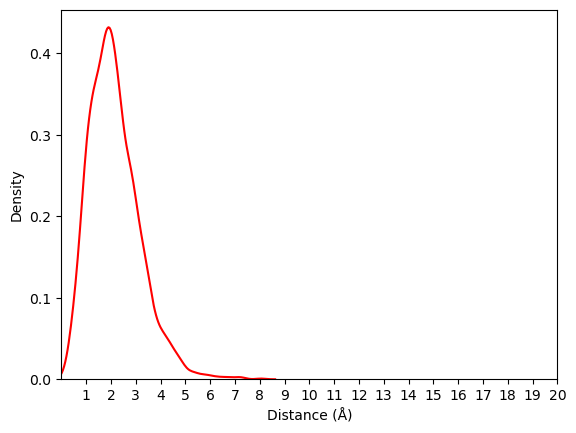

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(diff, color='red')
plt.xlim(0, 20)
plt.xticks(np.arange(1, 21))
plt.xlabel('Distance (Å)')
plt.ylabel('Density')
plt.show()



ref: https://jcheminf.biomedcentral.com/articles/10.1186/s13321-021-00547-7/figures/4

DCC result in independent test set

In [26]:
#df.drop(columns=['CCL_coord', 'CCA_coord'], inplace=True)
col_idx = df.columns.get_loc('CCL')
cols = list(df.columns)
cols.pop(col_idx)
cols.append('CCL')
df = df.loc[:, cols]
df

for index, row in df.iterrows():
    aa_length = len(row['AA'])
    label_length = len(row['labels'])
    pdb_id = row['pdb']
    
    if aa_length != label_length:
        print(f"AA length and label length do not match in row {index}")
        print(f"AA length: {aa_length}, label length: {label_length}")
        print(f"pdb_id: {pdb_id}")

